# LABORATORIO 2

## Arboles de decisión

Los árboles de decisión son algoritmos de aprendizaje automático supervisados, son uno de los algoritmos que pueden ser utilizados para inconvenientes de regresión y categorización. Funcionan dividiendo el grupo de datos completos en subconjuntos más pequeños, el resultado final es un árbol que tiene nodos de elección y nodos de hoja. 

Para realizar la práctica de laboratorio sobre arboles de decisión, se utilizó la biblioteca sklearn el cual brinda varias funciones que facilitan el aprendizaje automático. A continuación, se muestran los módulos que se necesitaron para realizar la práctica.


In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

Primero se utiliza pandas para cargar y leer los datos del archivo ‘cars.csv’ utilizando la librería de pandas. 

In [2]:
df = pandas.read_csv('cars.csv')
print(df)

     mpg   cylinders   cubicinches  ...   time-to-60  year     brand
0   14.0           8           350  ...           12  1972       US.
1   31.9           4            89  ...           14  1980   Europe.
2   17.0           8           302  ...           11  1971       US.
3   15.0           8           400  ...           10  1971       US.
4   30.5           4            98  ...           17  1978       US.
5   23.0           8           350  ...           17  1980       US.
6   13.0           8           351  ...           13  1974       US.
7   14.0           8           440  ...            9  1971       US.
8   25.4           5           183  ...           20  1980   Europe.
9   37.7           4            89  ...           17  1982    Japan.
10  34.0           4           108  ...           17  1983    Japan.
11  34.3           4            97  ...           16  1981   Europe.
12  16.0           8           302  ...           14  1975       US.
13  11.0           8           350

Se renombran las columnas, con el fin de poder manejar sus nombres de manera correcta, evitando cualquier error de sintaxis, posteriormente se procede a representar los valores alfanuméricos mediante una técnica básica de remplazo de valores. La representación de valores se la realiza para poder trabajar solo con valores numéricos, y el modelo pueda trabajar de forma óptima.   

In [3]:
df.columns =['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']
df = df.dropna()
df.head()
d = {' US.' : 0, ' Japan.' : 1, ' Europe.' : 2}
df['brand'] = df['brand'].map(d)

print(df)

     mpg  cylinders  cubicinches   hp weightlbs  time-to-60  year  brand
0   14.0          8          350  165      4209          12  1972      0
1   31.9          4           89   71      1925          14  1980      2
2   17.0          8          302  140      3449          11  1971      0
3   15.0          8          400  150      3761          10  1971      0
4   30.5          4           98   63      2051          17  1978      0
5   23.0          8          350  125      3900          17  1980      0
6   13.0          8          351  158      4363          13  1974      0
7   14.0          8          440  215      4312           9  1971      0
8   25.4          5          183   77      3530          20  1980      2
9   37.7          4           89   62      2050          17  1982      1
10  34.0          4          108   70      2245          17  1983      1
11  34.3          4           97   78      2188          16  1981      2
12  16.0          8          302  140      4141    

Se realiza la selección de características para realizar la predicción, se deben elegir las columnas que aportan más al objetivo del modelo.  

In [4]:
features = ['mpg','cylinders',  'hp',  'time-to-60', 'year']
X = df[features]

Posteriormente seleccionamos el objetivo, es decir la columna que contiene los valores que se desean predecir.

In [5]:
y = df['brand']

Se imprime los valores de ‘X’ y ‘y’, con el fin de verificar que los valores sean los correctos y puedan ser utilizados en el entrenamiento del modelo.

In [6]:
print(X, y, sep='\n\n')

     mpg  cylinders   hp  time-to-60  year
0   14.0          8  165          12  1972
1   31.9          4   71          14  1980
2   17.0          8  140          11  1971
3   15.0          8  150          10  1971
4   30.5          4   63          17  1978
5   23.0          8  125          17  1980
6   13.0          8  158          13  1974
7   14.0          8  215           9  1971
8   25.4          5   77          20  1980
9   37.7          4   62          17  1982
10  34.0          4   70          17  1983
11  34.3          4   78          16  1981
12  16.0          8  140          14  1975
13  11.0          8  180          11  1974
14  19.1          6   90          19  1981
15  16.9          8  155          15  1980
16  31.8          4   65          19  1980
17  16.0          8  150          12  1971
18  24.0          4   95          16  1973

0     0
1     2
2     0
3     0
4     0
5     0
6     0
7     0
8     2
9     1
10    1
11    2
12    0
13    0
14    0
15    0
16    1
17 

Con ayuda de la librería sklearn se realiza la creación de un árbol de decisiones utilizando DecisionTreeClassifier. Mediante método “fit” se construye un clasificador de árbol de decisión a partir del conjunto de entrenamiento (X, y).

In [7]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

Para finalizar se guarda el árbol de decisiones como una imagen utilizando pydotplus.

In [8]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

Finalmente visualizamos el árbol de decisión utilizando la librería matplotlib

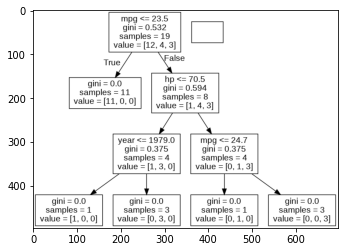

In [9]:
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()